In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve
from sklearn.metrics import auc
from sklearn import preprocessing 

In [2]:
data = pd.read_csv(r"/home/mllab/Desktop/bank.csv", delimiter = ';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
enc = preprocessing.LabelEncoder()
data["y"] = enc.fit_transform(data["y"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [6]:
X = data.iloc[ : , :-1]
Y = data.iloc[ : , -1]

In [7]:
num_features = X.select_dtypes(include = ['int64', 'float64']).columns
cat_features = X.select_dtypes(include = ['object', 'category']).columns

In [8]:
X[num_features] = X[num_features].fillna(X[num_features].mean())

In [9]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

In [10]:
encoded_cols = encoder.fit_transform(data[cat_features])

In [11]:
encoded_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(cat_features))

In [12]:
X = X.drop(columns = cat_features).reset_index(drop = True)

In [13]:
X = pd.concat([X, encoded_df], axis = 1)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4521 non-null   int64  
 1   balance              4521 non-null   int64  
 2   day                  4521 non-null   int64  
 3   duration             4521 non-null   int64  
 4   campaign             4521 non-null   int64  
 5   pdays                4521 non-null   int64  
 6   previous             4521 non-null   int64  
 7   job_admin.           4521 non-null   float64
 8   job_blue-collar      4521 non-null   float64
 9   job_entrepreneur     4521 non-null   float64
 10  job_housemaid        4521 non-null   float64
 11  job_management       4521 non-null   float64
 12  job_retired          4521 non-null   float64
 13  job_self-employed    4521 non-null   float64
 14  job_services         4521 non-null   float64
 15  job_student          4521 non-null   f

In [14]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.20, random_state = 42)

In [15]:
from sklearn.svm import SVC
rbfsvm = SVC(kernel = "rbf")
rbfsvm.fit(X_train, Y_train)

SVC()

In [16]:
def evaluate(model, title, X, Y):
    Y_pred = model.predict(X)
    crep = classification_report(Y, Y_pred)
    print(f"Classification report of {title}")
    print(crep)
    
    print()
    
    cm = confusion_matrix(Y, Y_pred)
    dis = ConfusionMatrixDisplay(confusion_matrix = cm)
    dis.plot()
    plt.title(f"Confusion Matrix of {title}")
    plt.show()

Classification report of Radial SVM
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905




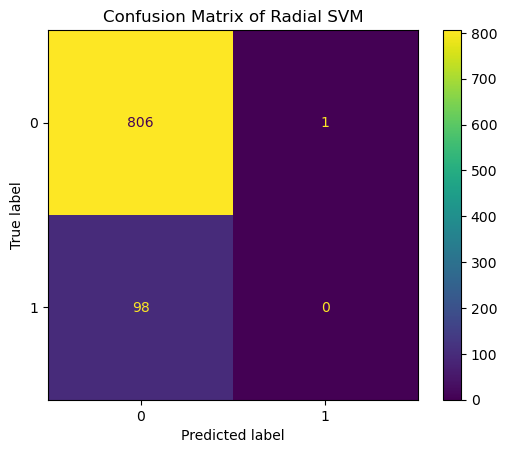

In [17]:
evaluate(rbfsvm, "Radial SVM", X_test, Y_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(random_state = 42)

In [20]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Classification report of Random Forest
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.26      0.36        98

    accuracy                           0.90       905
   macro avg       0.76      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905




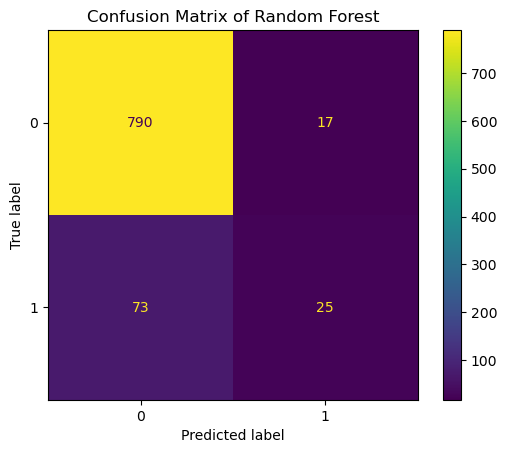

In [21]:
evaluate(rf, "Random Forest", X_test, Y_test)

In [22]:
param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : [5, 7, 10, 20],
    "max_features" : ['sqrt', 'log2']
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
gs = GridSearchCV(estimator = rf, param_grid = param_grid)

In [25]:
gs.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [26]:
opt_params = gs.best_params_
a1 = opt_params["n_estimators"]
a2 = opt_params["max_depth"]
a3 = opt_params["max_features"]

In [27]:
print(f"The optimal number of trees in random forest are {a1}")
print(f"The optimal depth of the tree is {a2}")
total_f = X.shape[1]
if a3 == 'sqrt':
    a33 = np.sqrt(total_f)
else:
    a33 = np.log2(total_f)
a33 = np.floor(a33)
print(f"The optimal number of samples split is {a33}")

The optimal number of trees in random forest are 200
The optimal depth of the tree is 20
The optimal number of samples split is 7.0


In [28]:
import tensorflow

2024-11-12 16:01:34.641732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [30]:
kerasmodel = Sequential()
kerasmodel.add(Dense(51, input_dim = 51, activation = 'relu'))
kerasmodel.add(Dense(32, activation = 'relu'))
kerasmodel.add(Dense(32, activation = 'relu'))
kerasmodel.add(Dense(1, activation = 'sigmoid'))

2024-11-12 16:01:38.096905: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
kerasmodel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [40]:
kerasmodel.fit(X_train, Y_train, epochs = 150, batch_size = 10)

Epoch 1/150
362/362 [==============================] - 1s 1ms/step - loss: 0.2375 - accuracy: 0.8971
Epoch 2/150
362/362 [==============================] - 1s 1ms/step - loss: 0.2333 - accuracy: 0.9010
Epoch 3/150
362/362 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.8916
Epoch 4/150
362/362 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.8966
Epoch 5/150
362/362 [==============================] - 1s 2ms/step - loss: 0.2425 - accuracy: 0.8952
Epoch 6/150
362/362 [==============================] - 1s 1ms/step - loss: 0.2357 - accuracy: 0.8946
Epoch 7/150
362/362 [==============================] - 1s 2ms/step - loss: 0.2254 - accuracy: 0.8996
Epoch 8/150
362/362 [==============================] - 1s 2ms/step - loss: 0.2395 - accuracy: 0.8963
Epoch 9/150
362/362 [==============================] - 1s 2ms/step - loss: 0.2270 - accuracy: 0.9029
Epoch 10/150
362/362 [==============================] - 1s 1ms/step - loss: 0.2311 - accura

362/362 [==============================] - 1s 2ms/step - loss: 0.2201 - accuracy: 0.9040
Epoch 82/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.9054
Epoch 83/150
362/362 [==============================] - 1s 4ms/step - loss: 0.2203 - accuracy: 0.9074
Epoch 84/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.9090
Epoch 85/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2270 - accuracy: 0.9071
Epoch 86/150
362/362 [==============================] - 1s 2ms/step - loss: 0.2123 - accuracy: 0.9062
Epoch 87/150
362/362 [==============================] - 1s 2ms/step - loss: 0.2107 - accuracy: 0.9071
Epoch 88/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2112 - accuracy: 0.9085
Epoch 89/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2138 - accuracy: 0.9046
Epoch 90/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 

In [41]:
train_loss, train_acc = kerasmodel.evaluate(X_train, Y_train)
print(f"The training accuracy is {train_acc * 100 : .4f}")

113/113 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9104
The training accuracy is  91.0398


In [42]:
# Y_pred = kerasmodel.predict(X_test)
_, test_acc = kerasmodel.evaluate(X_test, Y_test)
print(f"The testing accuracy is {test_acc * 100 : .4f}")

29/29 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8983
The testing accuracy is  89.8343


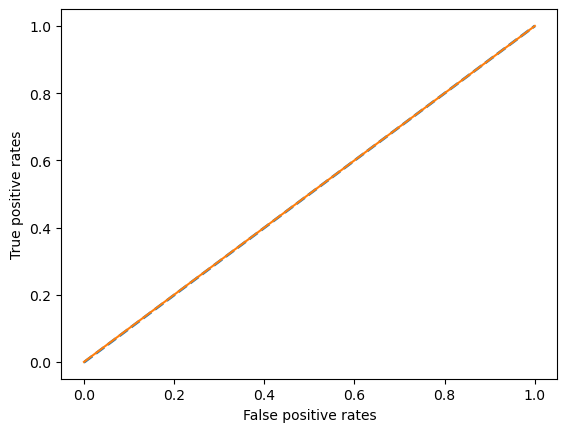

0.4993804213135068


In [47]:
Y_pred1 = rbfsvm.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, Y_pred1)
plt.plot(fpr, tpr, linestyle = "--", linewidth = 2)
plt.plot([0, 1], [0, 1])
plt.xlabel("False positive rates")
plt.ylabel("True positive rates")
plt.show()
auc1 = auc(fpr, tpr)
print(auc1)

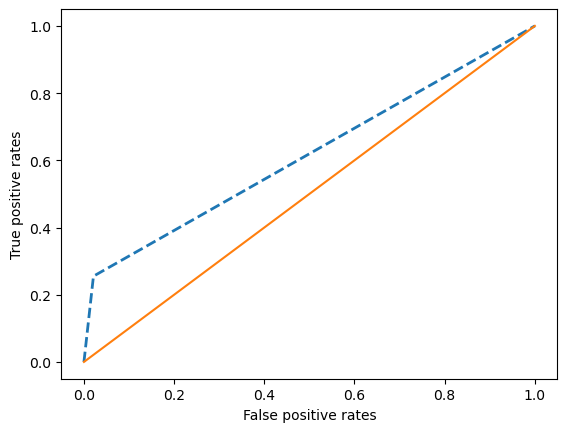

0.6170181827377791


In [44]:
Y_pred2 = rf.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, Y_pred2)
plt.plot(fpr, tpr, linestyle = "--", linewidth = 2)
plt.plot([0, 1], [0, 1])
plt.xlabel("False positive rates")
plt.ylabel("True positive rates")
plt.show()
auc2 = auc(fpr, tpr)
print(auc2)

29/29 [==============================] - 0s 1ms/step


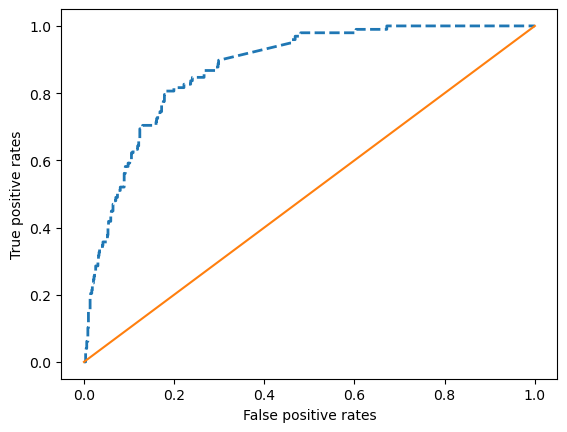

0.8762802518777028


In [46]:
Y_pred3 = kerasmodel.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, Y_pred3)
plt.plot(fpr, tpr, linestyle = "--", linewidth = 2)
plt.plot([0, 1], [0, 1])
plt.xlabel("False positive rates")
plt.ylabel("True positive rates")
plt.show()
auc3 = auc(fpr, tpr)
print(auc3)